# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

I would use the nf-core/differentialabundance pipeline.

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

In [1]:
import pandas as pd

samples = [
    ("Sham_oxy_1", "Sham_oxy", 1),
    ("Sham_oxy_2", "Sham_oxy", 2),
    ("Sham_oxy_3", "Sham_oxy", 3),
    ("Sham_oxy_4", "Sham_oxy", 4),
    ("Sham_Sal_1", "Sham_Sal", 1),
    ("Sham_Sal_2", "Sham_Sal", 2),
    ("Sham_Sal_3", "Sham_Sal", 3),
    ("Sham_Sal_4", "Sham_Sal", 4),
    ("SNI_oxy_1", "SNI_oxy", 1),
    ("SNI_oxy_2", "SNI_oxy", 2),
    ("SNI_oxy_3", "SNI_oxy", 3),
    ("SNI_oxy_4", "SNI_oxy", 4),
    ("SNI_Sal_1", "SNI_Sal", 1),
    ("SNI_Sal_2", "SNI_Sal", 2),
    ("SNI_Sal_3", "SNI_Sal", 3),
    ("SNI_Sal_4", "SNI_Sal", 4)
]


sample_metadata = pd.DataFrame(samples, columns=["sample", "condition", "replicate"])
sample_metadata.to_csv("samplesheet.csv", index=False)
sample_metadata


,sample,condition,replicate
0,Sham_oxy_1,Sham_oxy,1
1,Sham_oxy_2,Sham_oxy,2
2,Sham_oxy_3,Sham_oxy,3
3,Sham_oxy_4,Sham_oxy,4
4,Sham_Sal_1,Sham_Sal,1
5,Sham_Sal_2,Sham_Sal,2
6,Sham_Sal_3,Sham_Sal,3
7,Sham_Sal_4,Sham_Sal,4
8,SNI_oxy_1,SNI_oxy,1
9,SNI_oxy_2,SNI_oxy,2


Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [2]:
!nextflow run nf-core/differentialabundance \
     --input samplesheet.csv \
     --contrasts ./data/contrasts.csv \
     --matrix ./data/salmon.merged.gene_counts.tsv \
     --outdir ./differentialabundance-out  \
     -r 1.5.0 \
     -profile rnaseq,docker \
     -resume


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [ridiculous_curie] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : ridiculous_curie
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /Users/al/Desktop/Computationa

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

1. --input samplesheet.csv -> Metadata of Samples (Name, Condition, Replicate)
2. --contrasts ./data/contrasts.csv -> Defines the contrasts that should be measured (x vs. y)
3. --matrix ./data/salmon.merged.gene_counts.tsv -> The expression matrix
4. --outdir ./differentialabundance-out  -> The directiory for the results


What were the outputs of the pipeline?

THe outputs are mainly, plots (volcano, PCA, Dendrogram), pipeline_infos and QC reports.

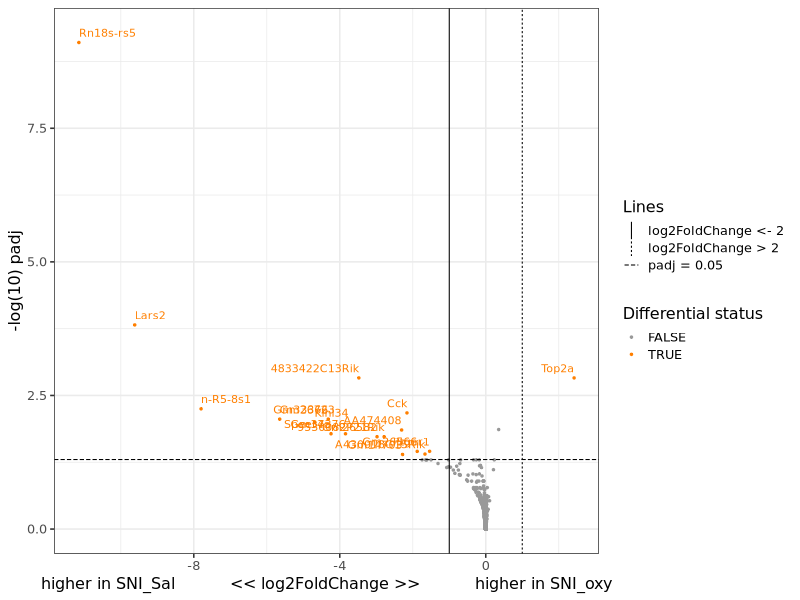

In [6]:
from IPython.display import Image, display

# Example of one volcano plot
display(Image(filename="./differentialabundance-out/plots/differential/condition_control_treated/png/volcano.png"))

Would you exclude any samples? If yes, which and why?

In the PCA you can see clearly, that the two samples SNI_Sal_4 and SNI_Sal_2 are big outliers. They should be excluded because this difference could be just archieved by technical and not by biological biases.

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

In the first contrast (SNI_Sal,SNI_oxy) it were 18, in the second (SNI_Sal,Sham_Sal) it were 74, in the third (Sham_Sal,Sham_oxy) it were 7 and in the fourth (SNI_oxy,Sham_Sal) it were 1. This is much less than the authors indicated (SNI_Sal,SNI_oxy has no specification, SNI_Sal,Sham_Sal has 1457 and Sham_Sal,Sham_oxy has 2609 and SNI_oxy,Sham_Sal has 1012 DE genes there). This huge difference in the results seem like the authors didnt made a proper QC.

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

1. Nucleus Accumbens (NAc) is part of the basal ganglia in the forebrain which is central in the brain reward system.
2. Medial Prefrontal Cortex (mPFC) is a portion of the prefrontal cortex which is responsable for executive functions.
3. Ventral Tegmental Area (VTA) is in the midbrain and contains dopaminergic neurons that project to the NAc, mPFC, and other regions and which are crutial for reward processing, motivation and reinforcement learning.

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

In table 1 in the paper there is a list that connects brain regions, pathways and DE genes.

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state? No, because you wanna enrich them with metadata such as GO-Terms, Pathways, Functions, specific sucelltypes, ect. to make the DE genes better interpretable.

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

/Users/al/opt/anaconda3/envs/bio-workflow/lib/python3.13/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


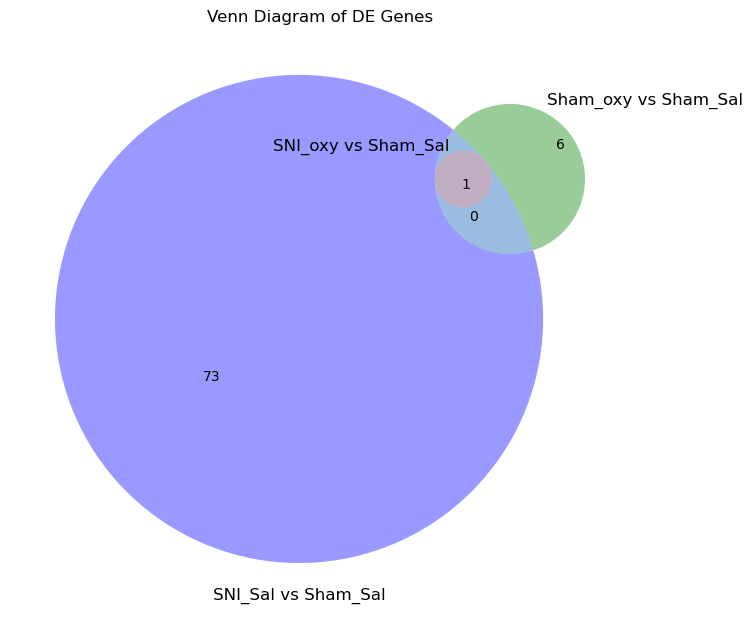

In [4]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

files = {
    "SNI_oxy_vs_Sham_Sal": "differentialabundance-out/tables/differential/condition_treated_baseline.deseq2.results_filtered.tsv",
    "Sham_oxy_vs_Sham_Sal": "differentialabundance-out/tables/differential/condition_control_treated_test.deseq2.results_filtered.tsv",
    "SNI_Sal_vs_Sham_Sal": "differentialabundance-out/tables/differential/condition_control_untreated.deseq2.results_filtered.tsv"
}


gene_sets = {}
for name, path in files.items():
    df = pd.read_csv(path, sep='\t')
    gene_sets[name] = set(df['gene_id'])

# Plot
plt.figure(figsize=(8,8))
venn3(subsets=(gene_sets["SNI_oxy_vs_Sham_Sal"], gene_sets["Sham_oxy_vs_Sham_Sal"], gene_sets["SNI_Sal_vs_Sham_Sal"]), set_labels=("SNI_oxy vs Sham_Sal", "Sham_oxy vs Sham_Sal", "SNI_Sal vs Sham_Sal"))
plt.title("Venn Diagram of DE Genes")
plt.show()
